In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# drop the unnecessary columns
df.drop(columns=['id','Unnamed: 32'],inplace=True)

In [5]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
#target --> diagnosis
# separate input and output
X = df.drop(columns='diagnosis')
y = df['diagnosis']

In [7]:
y.map({"M":0,"B":1}) # manual method for custom encoding

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [8]:
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [9]:
y.unique()

array(['M', 'B'], dtype=object)

In [10]:
# y --> target
# Preprocessing - LabelEncoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y) # learn the unique values in the columns

LabelEncoder()

In [11]:
le.classes_ # return the unique labels

array(['B', 'M'], dtype=object)

In [12]:
y_transform = le.transform(y)

In [13]:
y.values # array

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [14]:
y_transform

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [15]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [16]:
# on input dataset - preprocessing
# StandardScaler - on numerical columns
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [17]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

ss.fit(X) # mean, variance of the columns

StandardScaler()

In [18]:
ss.mean_ #mean

array([1.41272917e+01, 1.92896485e+01, 9.19690334e+01, 6.54889104e+02,
       9.63602812e-02, 1.04340984e-01, 8.87993158e-02, 4.89191459e-02,
       1.81161863e-01, 6.27976098e-02, 4.05172056e-01, 1.21685343e+00,
       2.86605923e+00, 4.03370791e+01, 7.04097891e-03, 2.54781388e-02,
       3.18937163e-02, 1.17961371e-02, 2.05422988e-02, 3.79490387e-03,
       1.62691898e+01, 2.56772232e+01, 1.07261213e+02, 8.80583128e+02,
       1.32368594e-01, 2.54265044e-01, 2.72188483e-01, 1.14606223e-01,
       2.90075571e-01, 8.39458172e-02])

In [19]:
ss.mean_.shape

(30,)

In [20]:
ss.var_

array([1.23970943e+01, 1.84663974e+01, 5.89402799e+02, 1.23625903e+05,
       1.97452073e-04, 2.78428549e-03, 6.34407875e-03, 1.50301462e-03,
       7.50222008e-04, 4.97611152e-05, 7.67671984e-02, 3.03781123e-01,
       4.08071149e+00, 2.06579462e+03, 8.99927022e-06, 3.20139261e-04,
       9.09596835e-04, 3.80055080e-05, 6.82128053e-05, 6.98938631e-06,
       2.33191693e+01, 3.77100918e+01, 1.12714643e+03, 3.23597671e+05,
       5.20403629e-04, 2.47112650e-02, 4.34475982e-02, 4.31314711e-03,
       3.82085668e-03, 3.25636075e-04])

In [21]:
ss.var_.shape

(30,)

In [22]:
X_transform = ss.transform(X) #
# for each value x , --> x-x_mean(of that column) / sqrt of variance (aka std)

In [23]:
X_transform

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [24]:
X.iloc[0,0]

17.99

In [25]:
(17.99 - 14.127292)/3.524049

1.0960994015690468

In [26]:
X_transform = pd.DataFrame(X_transform, columns=X.columns)
X_transform.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [27]:
X_transform.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.373633e-16,6.868164e-17,-1.248757e-16,-2.185325e-16,-8.366672e-16,1.873136e-16,4.995028e-17,-4.995028e-17,1.748260e-16,4.745277e-16,...,-8.241796e-16,1.248757e-17,-3.746271e-16,0.000000,-2.372638e-16,-3.371644e-16,7.492542e-17,2.247763e-16,2.622390e-16,-5.744282e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-0.642136,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-0.341181,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,0.357589,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [28]:
X_train,X_test,y_train,y_test = train_test_split(X_transform,y_transform,test_size=0.3, random_state=0)

In [29]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [30]:
# Scaling
# Fit & Transform on training data
# call fit and transform independely (fit_transform())
# Transform on test data

In [31]:
# X_test_transform = ss.transform(X_test)
y_pred = log.predict(X_test)

In [32]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [33]:
log.coef_

array([[ 0.25965337,  0.58891309,  0.27527119,  0.35070364,  0.13501664,
        -0.41458176,  0.67094946,  0.74096029,  0.37987661, -0.03289321,
         1.35087219, -0.14092099,  0.90852156,  0.98001244, -0.25957915,
        -0.92374666,  0.13448413,  0.34937963, -0.16812679, -0.91359164,
         0.8473647 ,  0.91043792,  0.73517119,  0.84764528,  0.56888501,
        -0.17670599,  0.82594672,  1.08228373,  0.48409262,  0.60758107]])

In [34]:
log.intercept_

array([-0.04258607])

In [35]:
# Features
# continous --> StandardScaler
# categorical --> Nominal (names - OneHotEncoder) / ordinal (Reviews) - LabelEncoder


# Target
# categorical - LabelEncoder

In [36]:
# log.predict_proba(X_test_transform)

NameError: name 'X_test_transform' is not defined

In [37]:
(log.predict_proba(X_test_transform)[:,1] > 0.5).astype("int") # default

NameError: name 'X_test_transform' is not defined

In [ ]:
(log.predict_proba(X_test_transform)[:,1] > 0.8).astype("int") 

# Evaluation

In [38]:
# Accuracy
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test,y_pred)

0.9766081871345029

In [40]:
y.value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [41]:
# reduce Type 2 Error --> Recall
# reduce Type 1 Error --> precision
# balance between both --> f1 score

In [42]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score

In [43]:
recall_score(y_test,y_pred)

0.9523809523809523

In [44]:
precision_score(y_test,y_pred)

0.9836065573770492

In [45]:
f1_score(y_test,y_pred)

0.9677419354838709

In [46]:
cm = confusion_matrix(y_test,y_pred)

In [47]:
cm

array([[107,   1],
       [  3,  60]])

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay

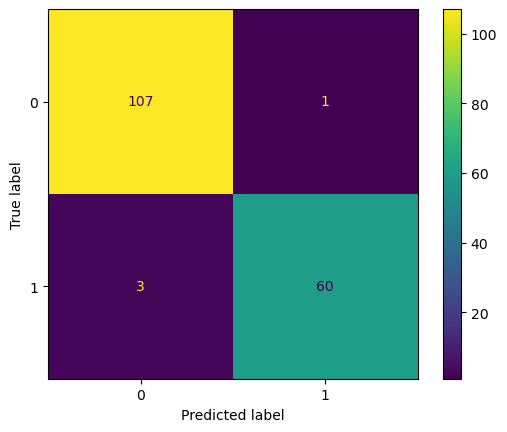

In [49]:
ConfusionMatrixDisplay(cm).plot()

In [50]:
# receiver operating characteristic - area under curve

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score

In [52]:
y_pred_proba = log.predict_proba(X_test)[:,1]

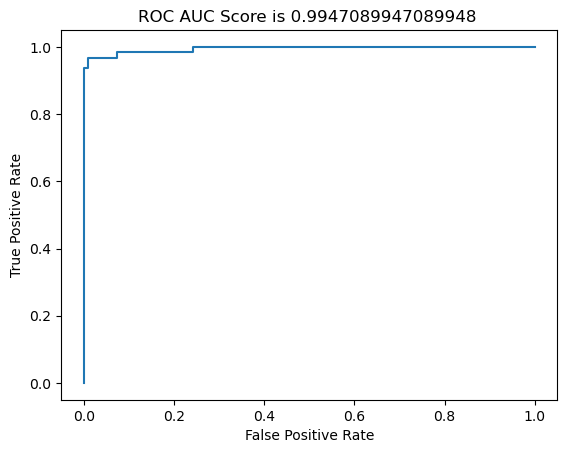

In [53]:
fpr, tpr, thresholds =  roc_curve(y_test,y_pred_proba)
auc_score= roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title(f"ROC AUC Score is {auc_score} ")
plt.show()

In [54]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 6.42055776e-01, 6.37659220e-01,
       4.99973880e-01, 3.22932526e-01, 2.77105984e-01, 3.29029686e-02,
       2.78402986e-02, 8.98930291e-09])

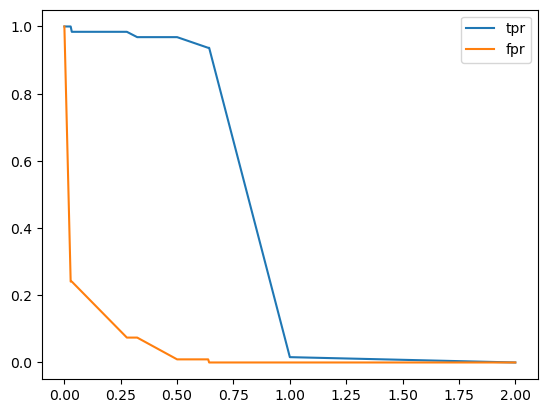

In [55]:
plt.plot(thresholds,tpr,label='tpr') 
plt.plot(thresholds,fpr,label='fpr')
plt.legend()

[]

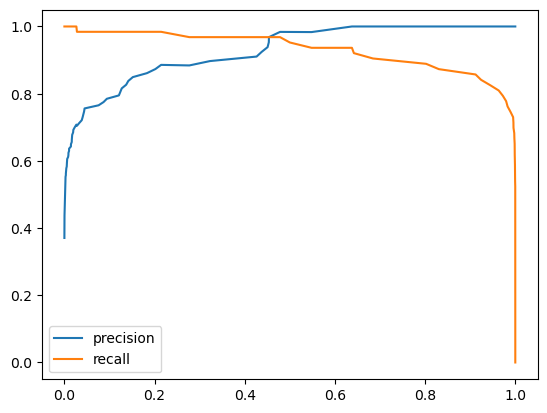

In [56]:
from sklearn.metrics import precision_recall_curve

precision,recall,thresholds = precision_recall_curve(y_test,y_pred_proba)
plt.plot(thresholds,precision[1:],label='precision') 
plt.plot(thresholds,recall[1:],label='recall')
plt.legend()
plt.plot()

In [57]:
recall.shape, thresholds.shape

((172,), (171,))

In [58]:
# Assumptions
# Assumptions of Linear Regression applies for LogisticRegression

In [59]:
x = np.linspace(-10,10,1000)

def sigmoid(x):
    return 1/(1+(np.exp(-x)))

In [60]:
np.max(x),np.min(x)

(10.0, -10.0)

In [61]:
y = sigmoid(x) # sigmoid = probability score

In [62]:
np.max(y),np.min(y)

(0.9999546021312976, 4.5397868702434395e-05)

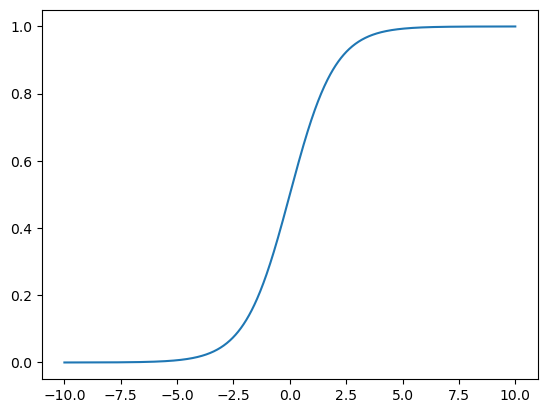

In [63]:
plt.plot(x,y)

# Decision Tree Classifier

 - No Mandatory to scale the data
 - We observe the Overfit

In [64]:
df = pd.read_csv("https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/data.csv")

In [65]:
#target --> diagnosis
# separate input and output
X = df.drop(columns='diagnosis')
y = df['diagnosis']

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X_transform,y_transform,test_size=0.3, random_state=0)

In [67]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

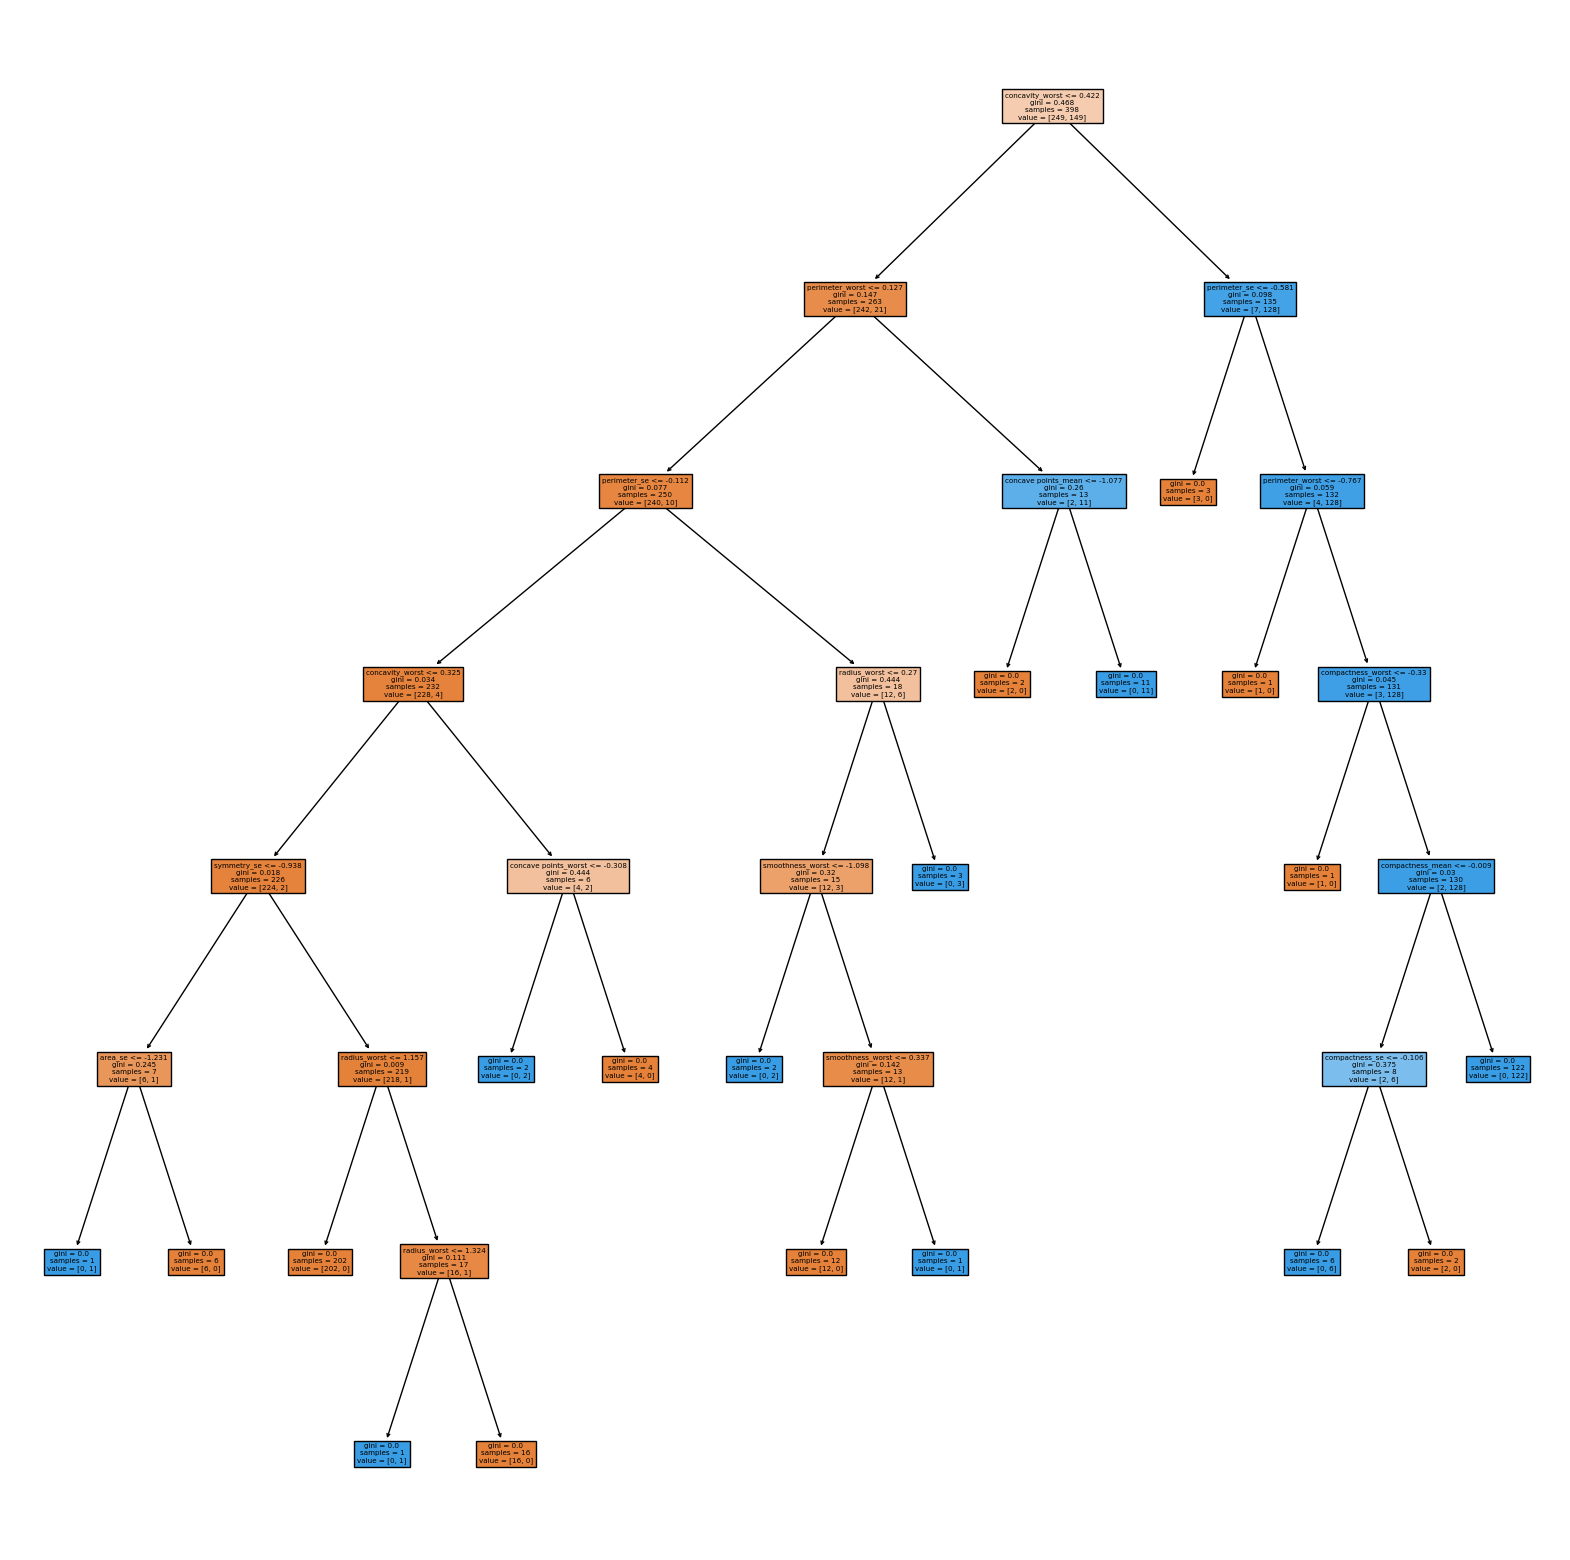

In [68]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(tree, feature_names=X.columns, filled=True)
plt.show()

In [69]:
y_pred = tree.predict(X_test)

In [70]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.888888888888889

In [71]:
tree.get_depth()

7

In [72]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00503366, 0.        , 0.01815419, 0.        ,
       0.        , 0.        , 0.        , 0.04749283, 0.00919498,
       0.        , 0.01609121, 0.        , 0.        , 0.00139161,
       0.        , 0.02784245, 0.        , 0.0963153 , 0.        ,
       0.02574594, 0.01032055, 0.728114  , 0.0143033 , 0.        ])

In [73]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
f1_score(y_test,y_pred)

0.9606299212598425

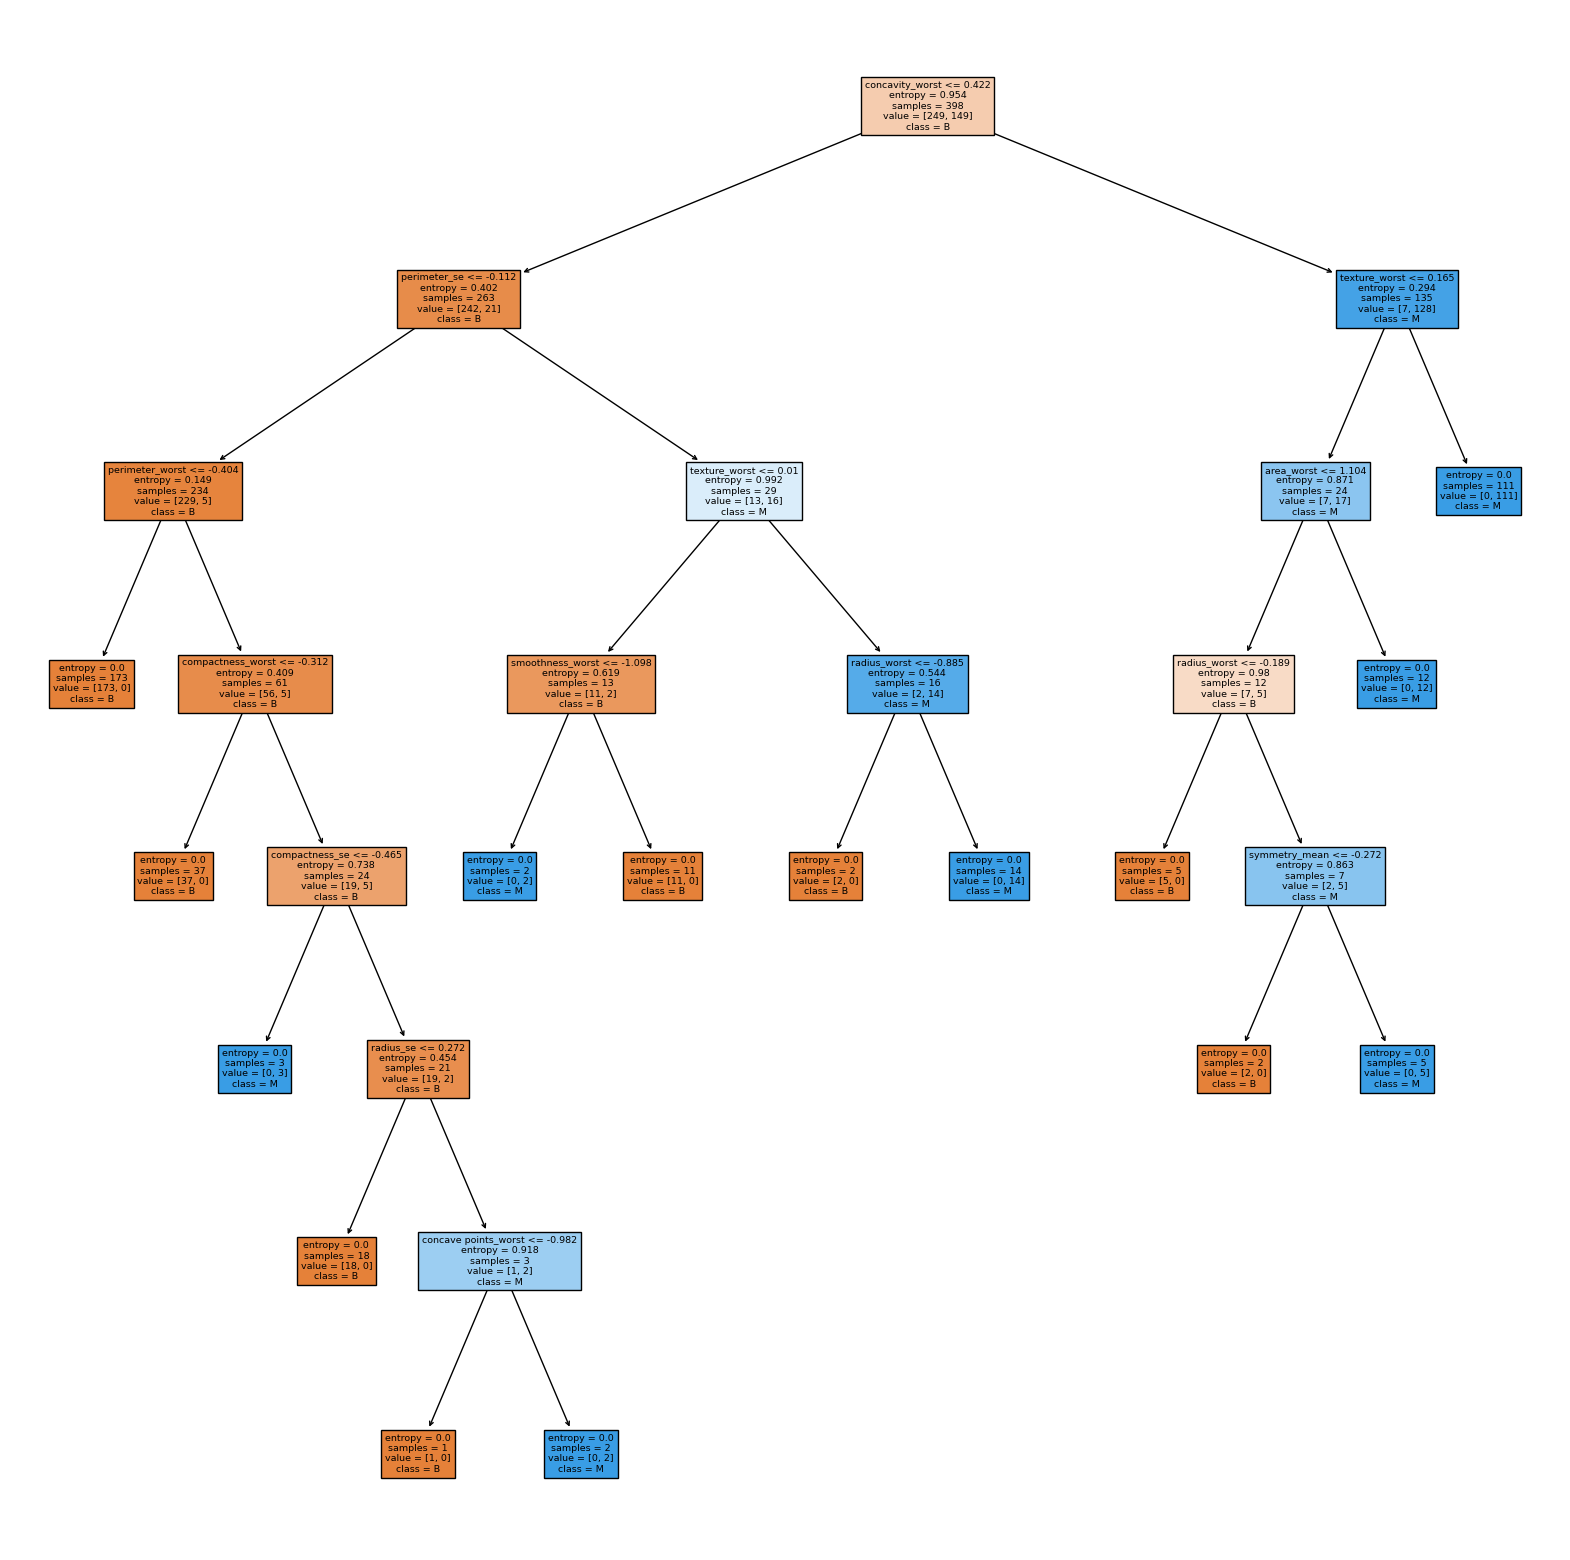

In [74]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(tree, feature_names=X.columns, filled=True, class_names=le.classes_)
plt.show()

In [75]:
y_train

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,

In [76]:
pd.Series(y_train).value_counts(normalize=True)

0    0.625628
1    0.374372
dtype: float64

In [77]:
#gini
1 - (0.625628*0.625628) - (0.374372*0.374372)

0.46843521123200005

In [78]:
# Hyperparamters
X_test.iloc[0]

radius_mean               -0.206561
texture_mean               0.286311
perimeter_mean            -0.137124
area_mean                 -0.279260
smoothness_mean            1.013376
compactness_mean           0.806556
concavity_mean             0.699320
concave points_mean        0.846065
symmetry_mean              1.111279
fractal_dimension_mean     1.481735
radius_se                 -0.052594
texture_se                -0.519362
perimeter_se               0.112343
area_se                   -0.146687
smoothness_se             -0.542348
compactness_se            -0.158063
concavity_se               0.087080
concave points_se          0.250429
symmetry_se               -0.422842
fractal_dimension_se       0.079469
radius_worst               0.029159
texture_worst              0.648570
perimeter_worst            0.179870
area_worst                -0.063607
smoothness_worst           1.097274
compactness_worst          0.835474
concavity_worst            1.143785
concave points_worst       1

In [79]:
tree.predict(X_test.iloc[:2])

array([1, 0])

In [80]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy',max_depth=3)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
f1_score(y_test,y_pred)

0.912

In [81]:
pd.Series(y_train).value_counts()

0    249
1    149
dtype: int64

In [82]:
from sklearn.model_selection import GridSearchCV
param_grid = {"criterion": ["gini", "entropy", "log_loss"],
             "max_depth":[2,3,4,5,6],
             "max_features":[None, "sqrt", "log2"]}

In [83]:
tree = DecisionTreeClassifier()
grid = GridSearchCV(estimator=tree, param_grid = param_grid,cv=4,verbose=1)

In [84]:
grid.fit(X_train,y_train)

Fitting 4 folds for each of 45 candidates, totalling 180 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': [None, 'sqrt', 'log2']},
             verbose=1)

In [85]:
grid.best_score_

0.9397727272727272

In [86]:
grid.best_params_

{'criterion': 'log_loss', 'max_depth': 4, 'max_features': 'log2'}

In [87]:
grid.best_estimator_ # model instance

DecisionTreeClassifier(criterion='log_loss', max_depth=4, max_features='log2')

In [88]:
best_model = grid.best_estimator_

In [89]:
best_model.predict(X_test)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [90]:
from sklearn.model_selection import RandomizedSearchCV
random = RandomizedSearchCV(estimator = tree,param_distributions = param_grid, n_iter = 5, verbose=1)

In [91]:
random.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=5,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, 3, 4, 5, 6],
                                        'max_features': [None, 'sqrt', 'log2']},
                   verbose=1)

In [92]:
random.best_params_

{'max_features': 'log2', 'max_depth': 4, 'criterion': 'entropy'}

In [ ]:
# WHEN THE NUMBER OF HYPERPARAMTERS TO TUNE IS VERY LONG LIST,
# For faster training choose Randomized SearchCV

# Training in backend - gridsearchcv